# Introduction

In this this project, we successfully employed a supervised machine learning approach to predict heart failure. Our analysis indicated that the Support Vector Machine model provided the best performance, as demonstrated by its highest cross-validation score. We further improved the SVM model by tuning its hyperparameters using GridSearchCV. The final model achieved an accuracy of 0.8587 on the test data, suggesting that it generalizes well to new, unseen data.

The project demonstrates the power of machine learning in tackling critical healthcare problems. The resulting model can be used as a valuable tool to assist medical professionals in identifying individuals at risk of heart failure, enabling timely interventions and potentially saving lives. 

# Dataset

- Dataset downloaded fr. Kaggle.com.
- Includes information on Cardiovascular Disease and related risk factors. 
- Utilizing a simple Machine Learning algorithm we can potentially detect and predict the risk for heart disease in a patient, which can be used to flag
 individuals at risk at initiate risk reducing medical measures.


## Feature Information

Attribute Information

- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

- Source : https://www.kaggle.com/fedesoriano/heart-failure-prediction

In [6]:
import pandas as pd
import seaborn as sns

heart_disease = pd.read_csv('heart.csv')

heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Problem Formulation

- Can we train a machine learning algorithm to predict the prevalence of heart disease in a sample of patients, generalize the findings and estimate the risk of heart disease in a new sample of patients?


# Data Visualization

In [7]:
# Setting palette

colors = ["#fee6ce", "#fdae6b", "#e6550d"]
sns.set_palette(sns.color_palette('tab20c'))

## Data Composition

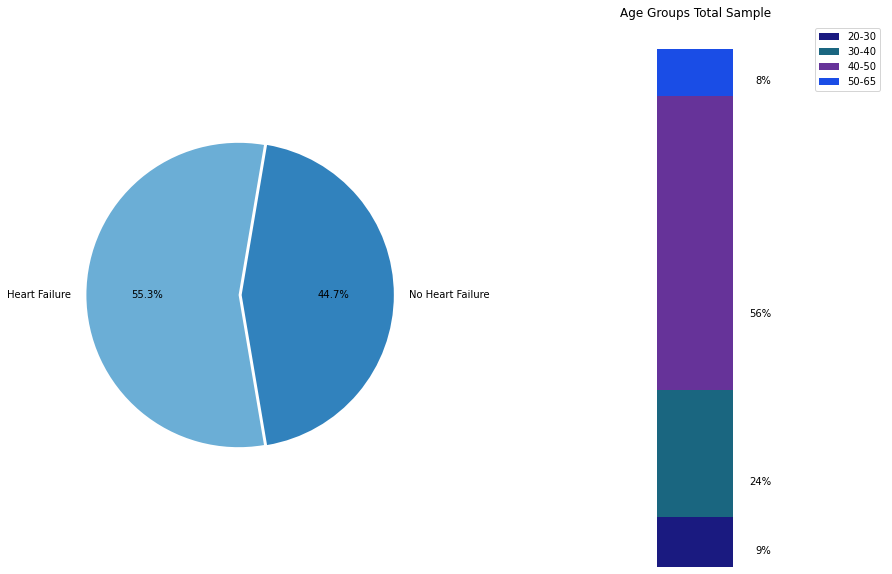

In [8]:
import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np


# make figure and assign axis objects
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 10))
plt.title("Cases of Heart Failure", fontsize = 20)

# pie chart parameters
ratios = [0.446623, 0.553377]
labels = ['No Heart Failure', 'Heart Failure']
explode = [0.02, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [0.095861,0.242919, 0.566449, 0.089325]
width = .2
colors = [[.1, 0.1, .5], [.1, .4, .5], [.4, .2, .6], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 4
    bottom += height
    ax2.text(xpos+0.2, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='right')

ax2.set_title('Age Groups Total Sample')
ax2.legend(('20-30', '30-40', '40-50', '50-65', '65+'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)




plt.show()

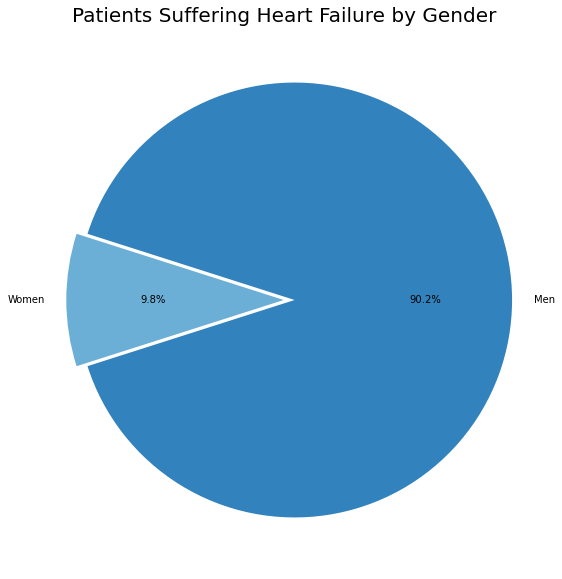

In [9]:
# Pie Chart Men and Women given that they have heart disease

import matplotlib.pyplot as plt
from matplotlib.patches import ConnectionPatch
import numpy as np


# Share of men and women with Heart Disease

heart_disease.groupby('Sex').HeartDisease



# make figure and assign axis objects
fig, (ax1) = plt.subplots(1, figsize=(15, 10))
fig.subplots_adjust(wspace=0)
plt.title("Patients Suffering Heart Failure by Gender", fontsize = 20)

# pie chart parameters
ratios = [0.901575, 0.098425]
labels = ['Men', 'Women']
explode = [0.05, 0]
# rotate so that first wedge is split by the x-axis
angle = -180 * ratios[0]
ax1.pie(ratios, autopct='%1.1f%%', startangle=angle,
        labels=labels, explode=explode)

# bar chart parameters

xpos = 0
bottom = 0
ratios = [0.095861,0.242919, 0.566449, 0.089325]
width = .2
colors = [[.1, 0.1, .5], [.1, .2, .5], [.4, .2, .6], [.1, .3, .9]]

for j in range(len(ratios)):
    height = ratios[j]
    ax2.bar(xpos, height, width, bottom=bottom, color=colors[j])
    ypos = bottom + ax2.patches[j].get_height() / 2
    bottom += height
    ax2.text(xpos+0.2, ypos, "%d%%" % (ax2.patches[j].get_height() * 100),
             ha='right')

ax2.set_title('Age Group Distribution')
ax2.legend(('20-30', '30-40', '40-50', '50-65', '65+'))
ax2.axis('off')
ax2.set_xlim(- 2.5 * width, 2.5 * width)



plt.show()


## Focusing on patients having a Heart Disease

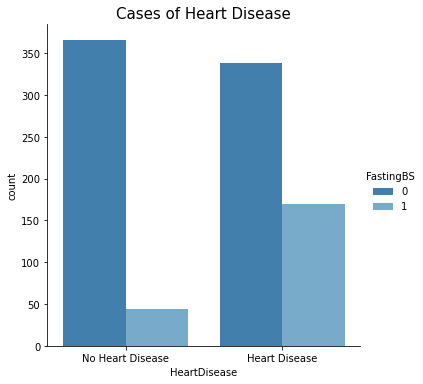

In [10]:
g2 = sns.catplot(data = heart_disease, x = 'HeartDisease', hue = 'FastingBS', kind = 'count')
plt.title("Cases of Heart Disease", fontsize = 15)
g2.set_xticklabels(["No Heart Disease", "Heart Disease"])

# Training and Hyper Parameter Tuning the model

In [11]:
heart_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
heart_disease.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

## Adjusting Columns to Enable Analysis

In [13]:
## Multiple Columns to take into consideration:

## Code yes/no binary columns to 1 for yes and 0 for no. 

heart_disease['ExerciseAngina'].replace({"Y":1, "N":0}, inplace = True)

heart_disease.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,0,0.0,Up,0


## Targets and Features

In [14]:
# Specifying target/feature variables

target = 'HeartDisease'
y = heart_disease[target]
X = heart_disease.drop(target, axis = 1)

## Training and Tuning

In [20]:
# Importing necessary packages
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Defining preprocessing functions
scaler = StandardScaler()
dummifier = OneHotEncoder(drop='if_binary')

# Split into train and test. Until final stage, only focus on the train set.
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)

# Specify numbers and categories columns

# Numbers
num_cols = X.select_dtypes('number').columns
num_trans = make_pipeline(scaler)

# Categories
cat_cols = X.select_dtypes('object').columns
cat_trans = make_pipeline(dummifier)

# Finalizing preprocessing by transforming columns into a single feature space.
preprocessor = make_column_transformer((num_trans, num_cols),
                                       (cat_trans, cat_cols),
                                       )

# Create a list of potential models and their respective hyperparameter grids
classifiers_and_grids = [
    (LogisticRegression(), {'logisticregression__C': [0.1, 1, 10, 100, 1000]}),
    (RandomForestClassifier(), {'randomforestclassifier__n_estimators': [10, 50, 100, 200], 'randomforestclassifier__max_depth': [None, 10, 20, 30]}),
    (SVC(), {'svc__C': [0.1, 1, 10, 100, 1000]}),
    (KNeighborsClassifier(), {'kneighborsclassifier__n_neighbors': [1, 3, 5, 7, 9], 'kneighborsclassifier__weights': ['uniform', 'distance']})
]

# Perform hyperparameter tuning for each classifier
for classifier, param_grid in classifiers_and_grids:
    pipe = make_pipeline(preprocessor, classifier)
    grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_score = grid.best_score_
    best_params = grid.best_params_
    print(f'Classifying Model: {classifier},\nAccuracy Score: {best_score}\nParameter: {best_params}\n')


Classifying Model: LogisticRegression(),
Accuracy Score: 0.86512906532476
Parameter: {'logisticregression__C': 0.1}

Classifying Model: RandomForestClassifier(),
Accuracy Score: 0.8705526046034852
Parameter: {'randomforestclassifier__max_depth': None, 'randomforestclassifier__n_estimators': 100}

Classifying Model: SVC(),
Accuracy Score: 0.8705526046034852
Parameter: {'svc__C': 1}



/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

Classifying Model: KNeighborsClassifier(),
Accuracy Score: 0.8583077066443016
Parameter: {'kneighborsclassifier__n_neighbors': 9, 'kneighborsclassifier__weights': 'distance'}



/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/jakobholmgren/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None 

## Comments: 

After testing different models (Logistic Regression, Random Forest, Support Vector Machine, and K-Nearest Neighbors) in the model selection phase, the Support Vector Machine (SVM) achieves the best score using cross-validation. This means that the SVM is most likely the best model for this particular problem. However, we can further improve the model by tuning its hyperparameters. In this case, we use GridSearchCV to search for the optimal value of the C parameter in the SVM, which controls the trade-off between achieving a low training error and a low testing error.

# Fitting and Evaluating

## Running Model on Test Data

After tuning the hyperparameters, we evaluate the best model on the test data to see how well it generalizes to new, unseen data. The model achieves an accuracy of 0.8587 on the test data, which suggests that it performs quite well.

In [21]:
# Running model with test data. 

grid.score(X_test,y_test)

0.8586956521739131

In this step, we plot the confusion matrix for the best model on the entire dataset, including both the training and test data. This visualization provides an overview of the model's performance on all available data, which can be useful for understanding its overall effectiveness.

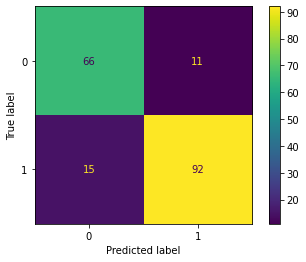

In [22]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid.best_estimator_, X_test, y_test)

## Running Model on all Data

In this step, we plot the confusion matrix for the best model on the entire dataset, including both the training and test data. This visualization provides an overview of the model's performance on all available data, which can be useful for understanding its overall effectiveness.

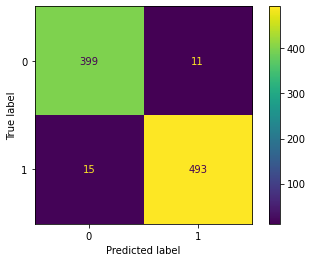

In [23]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(grid.best_estimator_, X, y)

# Refit best model on all data
In the final step, we create a new pipeline using the best hyperparameters found for the SVM classifier (C=10). We then fit the model on the entire dataset (X, y) to create a final model that can be used for making predictions on new, unseen data. This ensures that we are using all available information to train the model, which can lead to better performance when making predictions in practice.

In [24]:
model = make_pipeline(preprocessor, SVC(C = 10))

model.fit(X,y)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR',
       'ExerciseAngina', 'Oldpeak'],
      dtype='object')),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('onehotencoder',
                                                                   OneHotEncoder(drop='if_binary'))]),
                                                  Index(['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], dtype='object'))])),
                ('svc', SVC(C=10))])